<a href="https://colab.research.google.com/github/saraswatnitin/SOIL/blob/main/Insurance_Claims.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
#installing packages -- installing from jupyter notebook and terminal
!pip install statsmodels

In [ ]:
#You can use pandasql to write sql queries on dataframes
#If you dont have pandassql installed you can do a pip install
!pip install pandasql


In [ ]:
#We will do a force install of sqlalchemy=1.4 version so that it works fine with this pandasql query syntax
!pip install --force-reinstall sqlalchemy==1.4.46


  Using cached SQLAlchemy-1.4.46-cp310-cp310-manylinux_2_5_x86_64.manylinux1_x86_64.manylinux_2_17_x86_64.manylinux2014_x86_64.whl (1.6 MB)
  Using cached greenlet-3.0.1-cp310-cp310-manylinux_2_24_x86_64.manylinux_2_28_x86_64.whl (613 kB)
  Attempting uninstall: greenlet
    Found existing installation: greenlet 3.0.1
    Uninstalling greenlet-3.0.1:
      Successfully uninstalled greenlet-3.0.1
  Attempting uninstall: sqlalchemy
    Found existing installation: SQLAlchemy 1.4.46
    Uninstalling SQLAlchemy-1.4.46:
      Successfully uninstalled SQLAlchemy-1.4.46
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
ipython-sql 0.5.0 requires sqlalchemy>=2.0, but you have sqlalchemy 1.4.46 which is incompatible.


In [ ]:

import pandasql as ps

In [ ]:

import statsmodels.formula.api as smf

In [ ]:
import pandas as pd

In [ ]:
#read insurance losses csv file in pandas

insloss=pd.read_csv("insurance_losses.csv")

In [ ]:
type(insloss)

pandas.core.frame.DataFrame

In [ ]:
insloss.head()

,Policy_Number,Age,Years_of_Driving_Experience,Number_of_Vehicles,Gender,Married,Vehicle_Age,Fuel_Type,Losses
0,150023,24,5,1,M,Married,11,P,203
1,152720,31,10,1,F,Single,6,P,402
2,174207,56,37,1,M,Married,0,D,553
3,139895,52,31,1,F,Married,15,P,292
4,174407,20,3,1,M,Single,15,P,247


In [ ]:
insloss.tail()

,Policy_Number,Age,Years_of_Driving_Experience,Number_of_Vehicles,Gender,Married,Vehicle_Age,Fuel_Type,Losses
15285,189499,61,43,4,F,Single,11,P,58
15286,142111,69,48,4,F,Married,9,P,305
15287,175986,69,51,4,F,Married,13,P,282
15288,199800,22,4,4,M,Married,9,D,822
15289,187711,20,2,4,F,Married,2,P,407


In [ ]:
insloss.shape # No of rows and columns

(15290, 9)

In [ ]:
insloss.columns # What all columns are there

Index(['Policy_Number', 'Age', 'Years_of_Driving_Experience',
       'Number_of_Vehicles', 'Gender', 'Married', 'Vehicle_Age', 'Fuel_Type',
       'Losses'],
      dtype='object')

In [ ]:
##concept of singular and plural dtype and dtypes
insloss.dtypes

Policy_Number                   int64
Age                             int64
Years_of_Driving_Experience     int64
Number_of_Vehicles              int64
Gender                         object
Married                        object
Vehicle_Age                     int64
Fuel_Type                      object
Losses                          int64
dtype: object

In [ ]:
insloss.Policy_Number.dtype

dtype('int64')

In [ ]:
##

insloss.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15290 entries, 0 to 15289
Data columns (total 9 columns):
 #   Column                       Non-Null Count  Dtype 
---  ------                       --------------  ----- 
 0   Policy_Number                15290 non-null  int64 
 1   Age                          15290 non-null  int64 
 2   Years_of_Driving_Experience  15290 non-null  int64 
 3   Number_of_Vehicles           15290 non-null  int64 
 4   Gender                       15290 non-null  object
 5   Married                      15290 non-null  object
 6   Vehicle_Age                  15290 non-null  int64 
 7   Fuel_Type                    15290 non-null  object
 8   Losses                       15290 non-null  int64 
dtypes: int64(6), object(3)
memory usage: 1.1+ MB


In [ ]:
##Data Types of the Variables
#Policy_Number is just an ID field and is useless for any analytics

#Contiuous
#Age
#Years_of_Driving_Experience
#Number_of_Vehicles
#Vehicle_Age
#Losses (Target Variable)

#Categorical
#Gender
#Married
#Fuel_Type



In [ ]:
insloss.describe()

,Policy_Number,Age,Years_of_Driving_Experience,Number_of_Vehicles,Vehicle_Age,Losses
count,15290.000000,15290.000000,15290.000000,15290.000000,15290.000000,15290.000000
mean,149910.276651,42.328254,23.732897,2.495880,8.655723,389.858012
std,28948.806631,18.280511,17.850707,0.953776,4.344536,253.729469
min,100002.000000,16.000000,0.000000,1.000000,0.000000,13.000000
25%,124842.000000,24.000000,6.000000,2.000000,6.000000,226.000000
50%,149872.000000,42.000000,23.000000,2.000000,9.000000,355.000000
75%,175011.000000,61.000000,42.000000,3.000000,12.000000,489.000000
max,200000.000000,70.000000,53.000000,4.000000,15.000000,3500.000000


In [ ]:
#Concept of plotting inline (implicit) and plotting explicitly by calling plt.show()

import matplotlib.pyplot as plt

## If we dont do below then we will need to call plt.show() explicitly to plot the graph
%matplotlib inline

<Axes: >

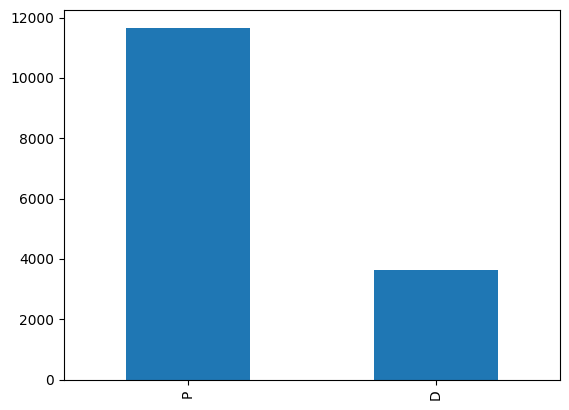

In [ ]:
#This requires matplotlib

insloss['Fuel_Type'].value_counts().plot(kind="bar")

In [ ]:
insloss['Fuel_Type'].value_counts()

P    11670
D     3620
Name: Fuel_Type, dtype: int64

In [ ]:
insloss['Losses'].mean()

389.8580117724003

In [ ]:
insloss['Losses'].median()

355.0

In [ ]:

insloss['Fuel_Type'].mode()

0    P
Name: Fuel_Type, dtype: object

In [ ]:
##Continuous and Categorical Variables

## For continuous variables -- see different quantiles and try to see outliers both graphically and quantile wise

#insloss.Losses.quantile([0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9,0.95,0.99])

##Percentile values starting from 10th  percentile to 100th percentile
print(insloss.Losses.quantile([0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9,0.95,0.99,1]))


0.10     122.0
0.20     195.0
0.30     260.0
0.40     314.0
0.50     355.0
0.60     399.0
0.70     454.0
0.80     538.0
0.90     685.0
0.95     821.0
0.99    1204.0
1.00    3500.0
Name: Losses, dtype: float64


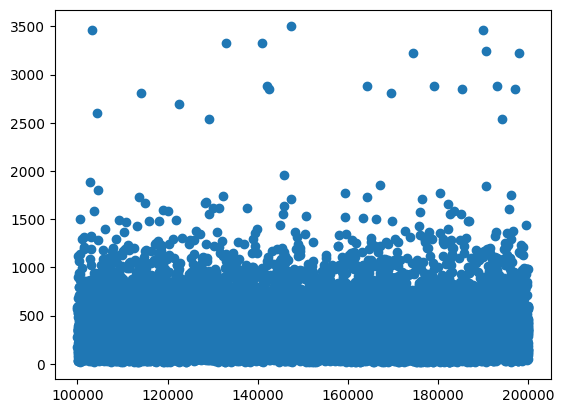

In [ ]:
#Try to see the same using scatterplot
##POlicy Number Vs Losses

plt.scatter(insloss.Policy_Number,insloss.Losses)

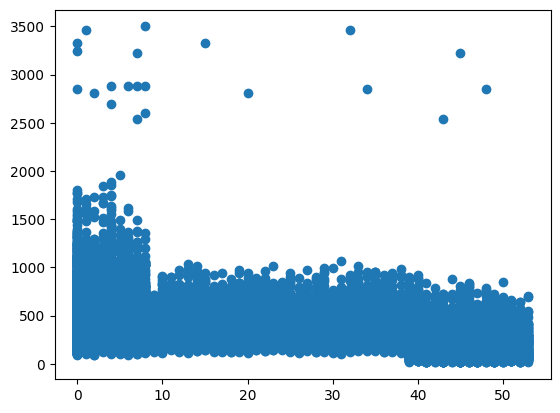

In [ ]:
#Years Of driving experience Vs Losses
plt.scatter(insloss.Years_of_Driving_Experience,insloss.Losses)

array([[<Axes: title={'center': 'Vehicle_Age'}>]], dtype=object)

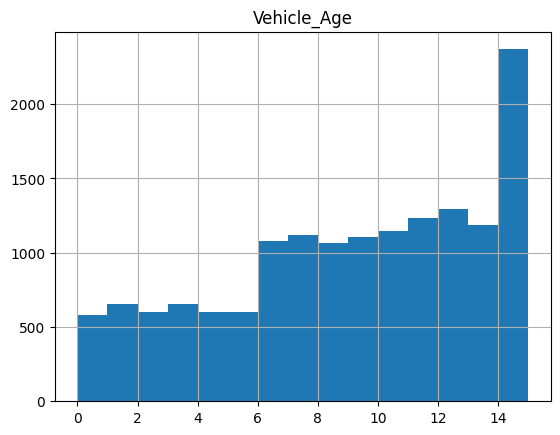

In [ ]:
#For categorical variables try box Plot
#Number_of_Vehicles
#Gender
#Married
#Fuel_Type

#by default no of bins =10 and we can change that
insloss.hist(column='Vehicle_Age',bins=15)


array([[<Axes: title={'center': 'Age'}>]], dtype=object)

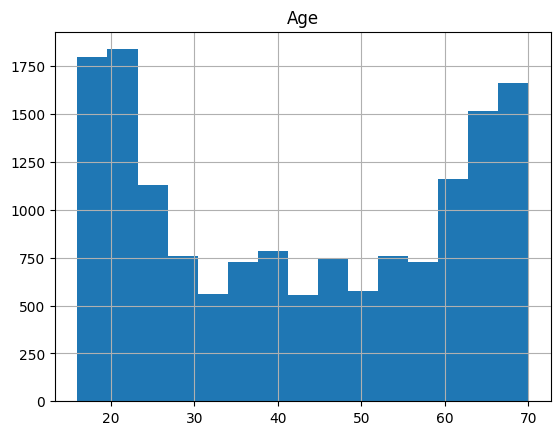

In [ ]:
insloss.hist(column='Age',bins=15)

<Axes: >

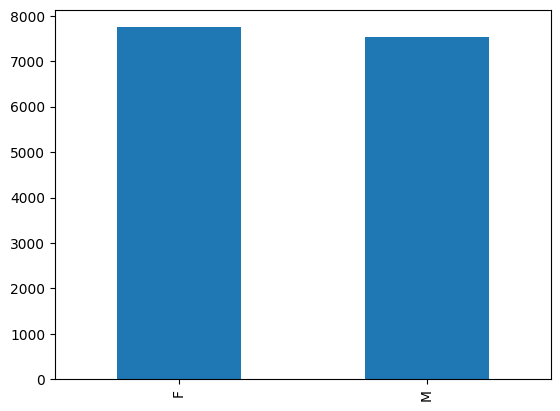

In [ ]:

##insloss.hist(column='Age')
insloss['Gender'].value_counts().plot(kind="bar")

In [ ]:
#Now that we are aware that we have outlier values in Losses so we will build a capping function which
#will cap all outliers to $1200 approx 99 percentile value

def caplossfunc(loss):
    if loss>1200:
        inslosscap=1200
    else:
        inslosscap=loss
    return inslosscap

In [ ]:
#Apply the function on Losses column and create a new column called inslosscap1
insloss['inslosscap1']=insloss['Losses'].map(caplossfunc)

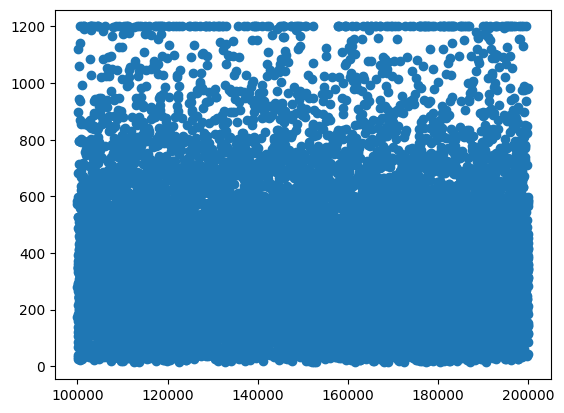

In [ ]:
plt.scatter(insloss.Policy_Number,insloss.inslosscap1)

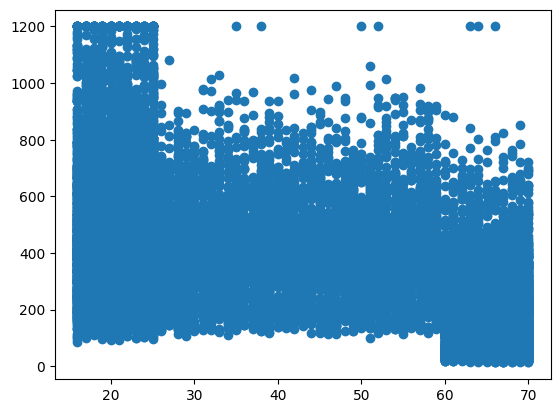

In [ ]:
#Age Scatterplot Vs Losses
plt.scatter(insloss.Age,insloss.inslosscap1)

In [ ]:
insloss.head()

,Policy_Number,Age,Years_of_Driving_Experience,Number_of_Vehicles,Gender,Married,Vehicle_Age,Fuel_Type,Losses,inslosscap1
0,150023,24,5,1,M,Married,11,P,203,203
1,152720,31,10,1,F,Single,6,P,402,402
2,174207,56,37,1,M,Married,0,D,553,553
3,139895,52,31,1,F,Married,15,P,292,292
4,174407,20,3,1,M,Single,15,P,247,247


In [ ]:
insloss.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15290 entries, 0 to 15289
Data columns (total 10 columns):
 #   Column                       Non-Null Count  Dtype 
---  ------                       --------------  ----- 
 0   Policy_Number                15290 non-null  int64 
 1   Age                          15290 non-null  int64 
 2   Years_of_Driving_Experience  15290 non-null  int64 
 3   Number_of_Vehicles           15290 non-null  int64 
 4   Gender                       15290 non-null  object
 5   Married                      15290 non-null  object
 6   Vehicle_Age                  15290 non-null  int64 
 7   Fuel_Type                    15290 non-null  object
 8   Losses                       15290 non-null  int64 
 9   inslosscap1                  15290 non-null  int64 
dtypes: int64(7), object(3)
memory usage: 1.2+ MB


In [ ]:
#now run sql like queries against pandas dataframes

rcount= ps.sqldf("select count(*) as CNT from insloss")

In [ ]:
rcount

,CNT
0,15290


In [ ]:
#There are more pythonic ways of doing this as well but if you are not well versed in Python
#especially pandas the learning curve might be steeper
#lossgt1200=ps.sqldf('''select * from insloss where Losses >1200''')

lossgt1200=ps.sqldf("select * from insloss where Losses >1200")

In [ ]:
lossgt1200.head()

,Policy_Number,Age,Years_of_Driving_Experience,Number_of_Vehicles,Gender,Married,Vehicle_Age,Fuel_Type,Losses,inslosscap1
0,147315,25,8,1,M,Single,5,D,3500,1200
1,190621,16,0,1,M,Single,15,P,3250,1200
2,142474,66,48,1,M,Single,10,P,2850,1200
3,194236,63,43,1,F,Single,10,P,2535,1200
4,185366,52,34,1,M,Married,5,D,2852,1200


In [ ]:

lossgt1200_inslosscap1=ps.sqldf("select * from insloss where insLosscap1 >1200")

In [ ]:
lossgt1200_inslosscap1
#no data corresponding to this

,Policy_Number,Age,Years_of_Driving_Experience,Number_of_Vehicles,Gender,Married,Vehicle_Age,Fuel_Type,Losses,inslosscap1


In [ ]:
#Notice that for Losses >1200 the values have been capped at 1200
lossgt1200.head()

,Policy_Number,Age,Years_of_Driving_Experience,Number_of_Vehicles,Gender,Married,Vehicle_Age,Fuel_Type,Losses,inslosscap1
0,147315,25,8,1,M,Single,5,D,3500,1200
1,190621,16,0,1,M,Single,15,P,3250,1200
2,142474,66,48,1,M,Single,10,P,2850,1200
3,194236,63,43,1,F,Single,10,P,2535,1200
4,185366,52,34,1,M,Married,5,D,2852,1200


In [ ]:
#Pythonic way ..using pandas

insloss.loc[insloss['Losses']> 1200].head()

#Both return the same result but it totally depends on you comfort level in pandas and eventually you would
#like to get there

,Policy_Number,Age,Years_of_Driving_Experience,Number_of_Vehicles,Gender,Married,Vehicle_Age,Fuel_Type,Losses,inslosscap1
101,147315,25,8,1,M,Single,5,D,3500,1200
102,190621,16,0,1,M,Single,15,P,3250,1200
103,142474,66,48,1,M,Single,10,P,2850,1200
104,194236,63,43,1,F,Single,10,P,2535,1200
105,185366,52,34,1,M,Married,5,D,2852,1200


array([[<Axes: title={'center': 'Losses'}>]], dtype=object)

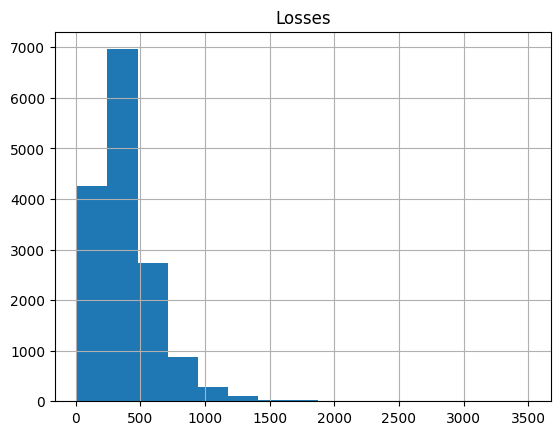

In [ ]:
insloss.hist(column='Losses',bins=15)

array([[<Axes: title={'center': 'inslosscap1'}>]], dtype=object)

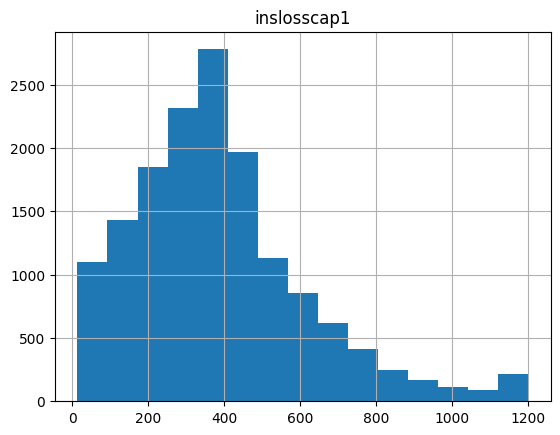

In [ ]:
insloss.hist(column='inslosscap1',bins=15)

In [ ]:
#As per the Freedman-Diaconis  rule -> ℎ=2×IQR×𝑛(−1/3)

#IQR
#n
#max
#min

max=insloss.Losses.max()
min=insloss.Losses.min()
n=insloss.Losses.count()
q1=insloss.Losses.quantile(0.25)
q3=insloss.Losses.quantile(0.75)
IQR=q3-q1
print("IQR= ",IQR)

IQR=  263.0


In [ ]:
#bin width
h=2*IQR*n**(-1/3)
print("Bin Width =",h)

Bin Width = 21.19255158817966


In [ ]:

#Hence number of bins
nbins=int((max-min)/h)
print("Number of bins = ",nbins)


Number of bins =  164


array([[<Axes: title={'center': 'Losses'}>]], dtype=object)

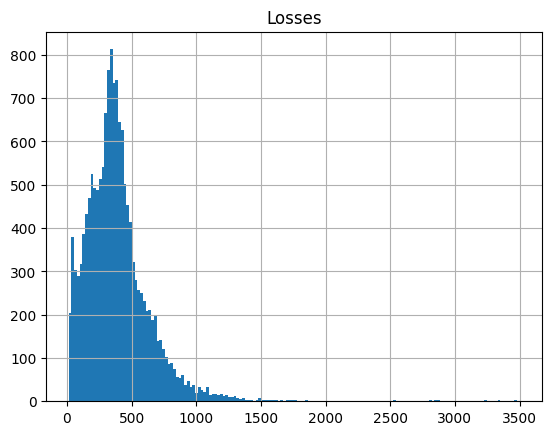

In [ ]:
#Now print a histogram with these values
insloss.hist(column='Losses',bins=nbins)

array([[<Axes: title={'center': 'Losses'}>]], dtype=object)

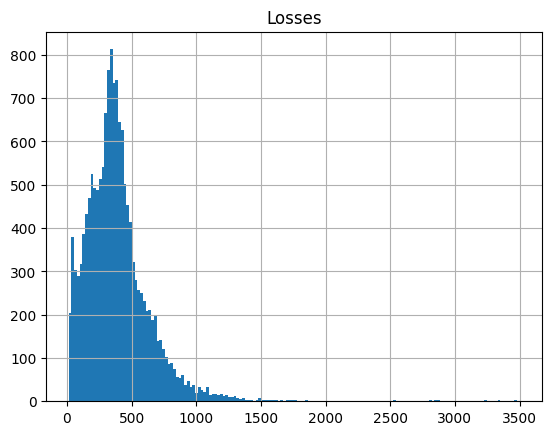

In [ ]:
#Now print a histogram with these values
insloss.hist(column='Losses',bins=nbins)

In [ ]:

#Do the same calculations on inslosscap1 values
max1=insloss.inslosscap1.max()
min1=insloss.inslosscap1.min()
q11=insloss.inslosscap1.quantile(0.25)
q31=insloss.inslosscap1.quantile(0.75)
IQR1=q31-q11
n1=insloss.inslosscap1.count()



In [ ]:
h1= 2*IQR1*n1**(-1/3)

In [ ]:


print("IQR1 =",IQR1)
print("h1= ",h1)

IQR1 = 263.0
h1=  21.19255158817966


In [ ]:
nbins1=int((max1-min1)/h1)
print("nbins1 =",nbins1)

nbins1 = 56


<Axes: >

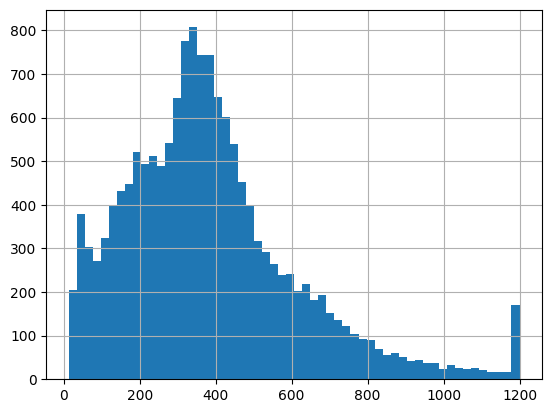

In [ ]:
insloss.inslosscap1.hist(bins=nbins1)

#Looks more of a Normal Distribution graph

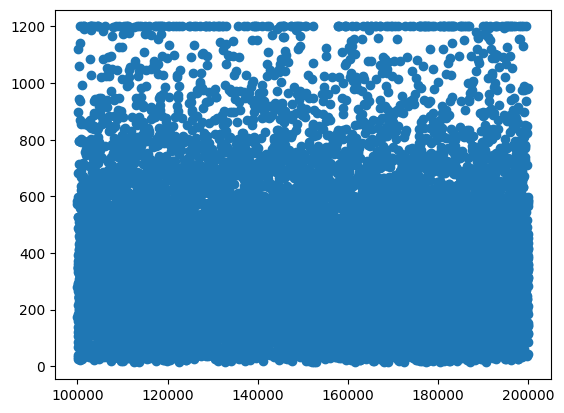

In [ ]:
plt.scatter(insloss.Policy_Number,insloss.inslosscap1)

#This looks more of a distribution with no outliers

In [ ]:

## Do  correlation analysis to see which independent variables are highly correlated
## Since we would like to keep only one of those variables , since higher the number of variables
##in the model worse will be its performance in generalizing or performing on test data

#Plot the correlation matrix

insloss.corr(method='pearson')

<ipython-input-104-f2b9e590a440>:7: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  insloss.corr(method='pearson')


,Policy_Number,Age,Years_of_Driving_Experience,Number_of_Vehicles,Vehicle_Age,Losses,inslosscap1
Policy_Number,1.000000,0.000659,0.001328,0.013103,-0.001303,0.004574,0.002118
Age,0.000659,1.000000,0.997161,0.008366,-0.243571,-0.442951,-0.475753
Years_of_Driving_Experience,0.001328,0.997161,1.000000,0.008545,-0.238172,-0.442103,-0.475259
Number_of_Vehicles,0.013103,0.008366,0.008545,1.000000,0.005924,-0.011548,-0.003211
Vehicle_Age,-0.001303,-0.243571,-0.238172,0.005924,1.000000,-0.274736,-0.289448
Losses,0.004574,-0.442951,-0.442103,-0.011548,-0.274736,1.000000,0.960857
inslosscap1,0.002118,-0.475753,-0.475259,-0.003211,-0.289448,0.960857,1.000000


In [ ]:
#We see  a strong correlation between Age and Years_of_Driving_Experience
#So which to keep and which to drop

import statsmodels.formula.api as smf

In [ ]:
model1 = smf.ols(formula='inslosscap1 ~ Age', data=insloss)

In [ ]:

res = model1.fit()

In [ ]:

print(res.summary())

                            OLS Regression Results                            
Dep. Variable:            inslosscap1   R-squared:                       0.226
Model:                            OLS   Adj. R-squared:                  0.226
Method:                 Least Squares   F-statistic:                     4473.
Date:                Fri, 24 Nov 2023   Prob (F-statistic):               0.00
Time:                        16:29:35   Log-Likelihood:            -1.0280e+05
No. Observations:               15290   AIC:                         2.056e+05
Df Residuals:                   15288   BIC:                         2.056e+05
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept    637.6578      4.105    155.346      0.0

In [ ]:
print('Parameters: ', res.params)
print('R2: ', res.rsquared_adj)

Parameters:  Intercept    637.657762
Age           -5.953929
dtype: float64
R2:  0.2262899920016097


In [ ]:
model2 = smf.ols(formula='inslosscap1 ~ Years_of_Driving_Experience', data=insloss)

In [ ]:
res2=model2.fit()

In [ ]:
print(res2.summary())

                            OLS Regression Results                            
Dep. Variable:            inslosscap1   R-squared:                       0.226
Model:                            OLS   Adj. R-squared:                  0.226
Method:                 Least Squares   F-statistic:                     4461.
Date:                Fri, 24 Nov 2023   Prob (F-statistic):               0.00
Time:                        16:30:15   Log-Likelihood:            -1.0280e+05
No. Observations:               15290   AIC:                         2.056e+05
Df Residuals:                   15288   BIC:                         2.056e+05
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                                  coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------------
Intercept         

In [ ]:
print('Parameters: ', res2.params)
print('R2: ', res2.rsquared_adj)

Parameters:  Intercept                      530.194526
Years_of_Driving_Experience     -6.090963
dtype: float64
R2:  0.22582072899414352


In [ ]:
# So from above 2 models we see Age fits the model better and hence we can drop Years_of_Driving_Experience

#Try a first cut of the model

fitlinreg= smf.ols(formula='inslosscap1 ~ Age+Number_of_Vehicles+Gender+Married+ \
                 +Vehicle_Age+Fuel_Type', data=insloss).fit()

In [ ]:
print(fitlinreg.summary())

                            OLS Regression Results                            
Dep. Variable:            inslosscap1   R-squared:                       0.723
Model:                            OLS   Adj. R-squared:                  0.723
Method:                 Least Squares   F-statistic:                     6637.
Date:                Fri, 24 Nov 2023   Prob (F-statistic):               0.00
Time:                        16:31:58   Log-Likelihood:                -94957.
No. Observations:               15290   AIC:                         1.899e+05
Df Residuals:                   15283   BIC:                         1.900e+05
Df Model:                           6                                         
Covariance Type:            nonrobust                                         
                         coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------
Intercept            835.0163      4

In [ ]:
print(fitlinreg.rsquared_adj)

0.7225510958109296


In [ ]:
#Now lets try to tune the model
#Can we do something about the Age, Vehicle Age since there distribution looks like there are some specific cluster
#in the data


distinct_age=ps.sqldf("select distinct(age) from insloss")

print(distinct_age.head())


   Age
0   24
1   31
2   56
3   52
4   20


In [ ]:
sumdf1=ps.sqldf("select b.Age,sum(Losses) as Sum_Losses,sum(inslosscap1) as \
                    Sum_Capped_losses, \
                    count(*) as Sum_Count from insloss a join distinct_age b on \
                    a.age=b.age group by \
                b.age")

print(sumdf1.head())

   Age  Sum_Losses  Sum_Capped_losses  Sum_Count
0   16      247717             242293        477
1   17      237152             232016        429
2   18      230959             226114        445
3   19      225259             221637        445
4   20      230889             225761        432


In [ ]:
Ageband=ps.sqldf("select Age, (sum_losses/sum_count) as avg_loss, \
                    (sum_capped_losses/sum_count) as Avg_capped_loss from sumdf1")
print(Ageband.head())

   Age  avg_loss  Avg_capped_loss
0   16       519              507
1   17       552              540
2   18       519              508
3   19       506              498
4   20       534              522


<Axes: xlabel='Age'>

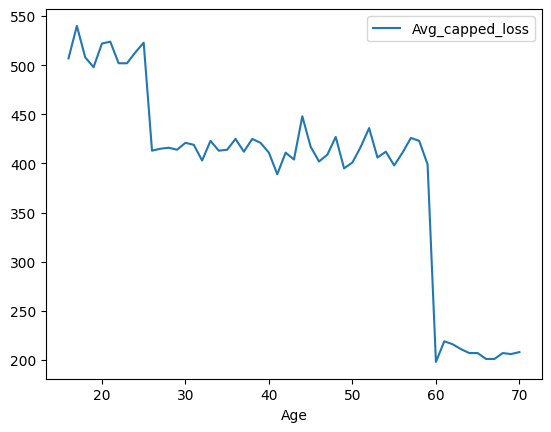

In [ ]:
Ageband.plot.line(x='Age',y='Avg_capped_loss')

In [ ]:
import math

In [ ]:
#Now from the graph it is clear there must be 3 age bands -
#16-25
#>25-59
#60+

#So lets create 3 age bands in our dataframe insloss

insloss['agebandcat'] = pd.cut(insloss['Age'], [15,25,59,math.inf], labels=['16-25', '26-59', '60+'])

In [ ]:
#Do a Similar Exercise with vehicle age band category

insloss['vehagebandcat']=pd.cut(insloss['Vehicle_Age'],[-1,5,10,math.inf], labels=['0-5', '6-10', '10+'])

In [ ]:
insloss.head()

,Policy_Number,Age,Years_of_Driving_Experience,Number_of_Vehicles,Gender,Married,Vehicle_Age,Fuel_Type,Losses,inslosscap1,agebandcat,vehagebandcat
0,150023,24,5,1,M,Married,11,P,203,203,16-25,10+
1,152720,31,10,1,F,Single,6,P,402,402,26-59,6-10
2,174207,56,37,1,M,Married,0,D,553,553,26-59,0-5
3,139895,52,31,1,F,Married,15,P,292,292,26-59,10+
4,174407,20,3,1,M,Single,15,P,247,247,16-25,10+


In [ ]:
#Now try and fit linear model using these categorical variables

model3=smf.ols(formula='inslosscap1 ~ agebandcat+Number_of_Vehicles+Gender+Married+ \
                 +Vehicle_Age+Fuel_Type', data=insloss).fit()

In [ ]:
print(model3.rsquared_adj)
#We see there is some improvement

0.7481752752156674


In [ ]:
#Now try and fit linear model using these categorical variables

model4=smf.ols(formula='inslosscap1 ~ agebandcat+Number_of_Vehicles+Gender+Married+ \
                 +vehagebandcat+Fuel_Type', data=insloss).fit()

In [ ]:
print(model4.rsquared_adj)
#some more improvement

0.7575424145761879


In [ ]:
#Now is there any step that we have missed before we would have even started on this exercise

#Train - Test split

from sklearn.model_selection import train_test_split

train, test = train_test_split(insloss, test_size=0.2)

In [ ]:
train.shape

(12232, 12)

In [ ]:
test.shape

(3058, 12)

In [ ]:
#Build model on train and then predict on test and see the accuracy

model5= smf.ols(formula='inslosscap1 ~ agebandcat+Number_of_Vehicles+Gender+Married+ \
                 +vehagebandcat+Fuel_Type', data=train).fit()

In [ ]:
print(model5.rsquared_adj)

0.7525807763944953


In [ ]:
#Now predict on test
pred_test = model5.predict(test)

In [ ]:
pred_test.head(10)

2905     300.371251
2817     345.893188
2644     751.287070
7860     300.663229
8301     273.752551
10892    270.410138
1488     224.304245
9946     224.888201
2065     440.654608
6782     345.808183
dtype: float64

In [ ]:
err=(test['inslosscap1'] - pred_test) **2
err.head()

2905      819.605246
2817     3036.760722
2644    14229.405012
7860     5378.281912
8301     1387.372427
dtype: float64

In [ ]:

meanerr=sum(err)
print(meanerr)

36136946.66502179


In [ ]:
mse= (meanerr/err.count())
print(mse)
#below is the mean square error

11817.183343695811


In [ ]:
model6= smf.ols(formula='inslosscap1 ~ Age+Number_of_Vehicles+Gender+Married+ \
                 +Vehicle_Age+Fuel_Type', data=train).fit()

In [ ]:
print(model6.rsquared_adj)

0.717938820140072


In [ ]:
print(model6.summary())

                            OLS Regression Results                            
Dep. Variable:            inslosscap1   R-squared:                       0.718
Model:                            OLS   Adj. R-squared:                  0.718
Method:                 Least Squares   F-statistic:                     5190.
Date:                Fri, 24 Nov 2023   Prob (F-statistic):               0.00
Time:                        16:35:02   Log-Likelihood:                -76047.
No. Observations:               12232   AIC:                         1.521e+05
Df Residuals:                   12225   BIC:                         1.522e+05
Df Model:                           6                                         
Covariance Type:            nonrobust                                         
                         coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------
Intercept            833.8102      5

In [ ]:
#Now predict on test
pred_test6 = model6.predict(test)

In [ ]:
err=(test['inslosscap1'] - pred_test6) **2
meanerr=sum(err)
mse6= (meanerr/err.count())
print(mse6)

13743.293331532801


In [ ]:
#Build a linear regression model using sklearn

In [ ]:
#insloss is the original raw dataset imported from the csv file
#insloss_cap is the one capped at 1200
#We will build 2 linear regression  models using significant varaibles as identified  earlier ->
## first on raw dataset
## then using capped losses and
## compare performance on the  test  data

#raw dataset
feature_cols=['Age','Number_of_Vehicles','Gender','Married','Vehicle_Age','Fuel_Type']
xpred_raw=insloss[feature_cols]
ypred_raw=insloss['Losses']

In [ ]:
#perform train-test split
from sklearn.model_selection import train_test_split

Xraw_train, Xraw_test, yraw_train, yraw_test = train_test_split(xpred_raw, ypred_raw, random_state=1)

In [ ]:
from sklearn.linear_model import LinearRegression
lm_raw = LinearRegression()
lm_raw.fit(Xraw_train,yraw_train)

## What is the problem here ??

ValueError: ignored

In [ ]:
#We will use pandas get_dummies method to encode categorical variables

insloss_encoded = pd.get_dummies(insloss, columns=['Number_of_Vehicles','Gender','Married','Fuel_Type'], drop_first=True)


In [ ]:

from sklearn.linear_model import LinearRegression

In [ ]:

insloss_encoded.head()

,Policy_Number,Age,Years_of_Driving_Experience,Vehicle_Age,Losses,inslosscap1,agebandcat,vehagebandcat,Number_of_Vehicles_2,Number_of_Vehicles_3,Number_of_Vehicles_4,Gender_M,Married_Single,Fuel_Type_P
0,150023,24,5,11,203,203,16-25,10+,0,0,0,1,0,1
1,152720,31,10,6,402,402,26-59,6-10,0,0,0,0,1,1
2,174207,56,37,0,553,553,26-59,0-5,0,0,0,1,0,0
3,139895,52,31,15,292,292,26-59,10+,0,0,0,0,0,1
4,174407,20,3,15,247,247,16-25,10+,0,0,0,1,1,1


In [ ]:
insloss_encoded.columns

Index(['Policy_Number', 'Age', 'Years_of_Driving_Experience', 'Vehicle_Age',
       'Losses', 'inslosscap1', 'agebandcat', 'vehagebandcat',
       'Number_of_Vehicles_2', 'Number_of_Vehicles_3', 'Number_of_Vehicles_4',
       'Gender_M', 'Married_Single', 'Fuel_Type_P'],
      dtype='object')

In [ ]:
#perform train-test split
feature_cols=[ 'Age', 'Years_of_Driving_Experience',
       'Number_of_Vehicles_2','Number_of_Vehicles_3', 'Number_of_Vehicles_4',
       'Gender_M',
       'Married_Single',
       'Fuel_Type_P']
xpred_raw=insloss_encoded[feature_cols]
ypred_raw=insloss['Losses']

Xraw_train, Xraw_test, yraw_train, yraw_test = train_test_split(xpred_raw, ypred_raw, test_size=0.2,random_state=1)


In [ ]:
print(Xraw_train.shape)
print(yraw_train.shape)
print(Xraw_test.shape)
print(yraw_test.shape)

(12232, 8)
(12232,)
(3058, 8)
(3058,)


In [ ]:
from sklearn.linear_model import LinearRegression
lm_raw = LinearRegression()
lm_raw.fit(Xraw_train,yraw_train)

LinearRegression()

In [ ]:
print(lm_raw.intercept_)
print(lm_raw.coef_)
print(lm_raw.score(Xraw_train,yraw_train,sample_weight=None)) # This is similar to R-square and the highest value is 1  => THe higher the value better model is

717.2259711818618
[  -1.2548824    -2.23543278   -6.49253436   -4.67184504   -7.24764469
   45.74768119   70.32557873 -358.15969244]
0.5995664385207764


In [ ]:
?lm_raw

In [ ]:
lm_raw.feature_names_in_

array(['Age', 'Years_of_Driving_Experience', 'Number_of_Vehicles_2',
       'Number_of_Vehicles_3', 'Number_of_Vehicles_4', 'Gender_M',
       'Married_Single', 'Fuel_Type_P'], dtype=object)

In [ ]:
raw_pred=lm_raw.predict(Xraw_test)

In [ ]:
from sklearn.metrics import mean_squared_error


In [ ]:
mse = mean_squared_error(y_true=yraw_test, y_pred=raw_pred, squared=True)

In [ ]:
mse

26708.18710408605

In [ ]:
#Now lets try with capped values

In [ ]:
feature_cols=[ 'Age', 'Years_of_Driving_Experience',
       'Number_of_Vehicles_2','Number_of_Vehicles_3', 'Number_of_Vehicles_4',
       'Gender_M',
       'Married_Single',
       'Fuel_Type_P']
xpred_capped=insloss_encoded[feature_cols]
ypred_capped=insloss['inslosscap1']

Xcapped_train, Xcapped_test, ycapped_train, ycapped_test = train_test_split(xpred_capped, ypred_capped, test_size=0.2,random_state=1)


In [ ]:
#train-test split
print(Xcapped_train.shape)
print(ycapped_train.shape)
print(Xcapped_test.shape)
print(ycapped_test.shape)



(12232, 8)
(12232,)
(3058, 8)
(3058,)


In [ ]:
from sklearn.linear_model import LinearRegression
lm_capped = LinearRegression()
lm_capped.fit(Xcapped_train,ycapped_train)

LinearRegression()

In [ ]:
print(lm_capped.intercept_)
print(lm_capped.coef_)
print(lm_capped.score(Xcapped_train,ycapped_train,sample_weight=None))

681.2943537768632
[-1.13082832e-01 -3.27693189e+00  3.97008061e-01  3.67328555e+00
 -7.91889240e-02  4.13148946e+01  6.45574644e+01 -3.49213011e+02]
0.6885166300325738


In [ ]:
capped_pred=lm_capped.predict(Xcapped_test)

In [ ]:
from sklearn.metrics import mean_squared_error
mse_capped = mean_squared_error(y_true=ycapped_test, y_pred=capped_pred, squared=True)
mse_capped


16481.67557398925

In [ ]:
#Now lets try to build the model using categorical variables
insloss.columns
#We will encode the newly created categorical variables also and then train on capped losses

Index(['Policy_Number', 'Age', 'Years_of_Driving_Experience',
       'Number_of_Vehicles', 'Gender', 'Married', 'Vehicle_Age', 'Fuel_Type',
       'Losses', 'inslosscap1', 'agebandcat', 'vehagebandcat'],
      dtype='object')

In [ ]:
#agebandcat	vehagebandcat
insloss_further_encoded = pd.get_dummies(insloss, columns=['agebandcat','vehagebandcat','Number_of_Vehicles','Gender','Married','Fuel_Type'], drop_first=True)



In [ ]:
insloss_further_encoded.head()

,Policy_Number,Age,Years_of_Driving_Experience,Vehicle_Age,Losses,inslosscap1,agebandcat_26-59,agebandcat_60+,vehagebandcat_6-10,vehagebandcat_10+,Number_of_Vehicles_2,Number_of_Vehicles_3,Number_of_Vehicles_4,Gender_M,Married_Single,Fuel_Type_P
0,150023,24,5,11,203,203,0,0,0,1,0,0,0,1,0,1
1,152720,31,10,6,402,402,1,0,1,0,0,0,0,0,1,1
2,174207,56,37,0,553,553,1,0,0,0,0,0,0,1,0,0
3,139895,52,31,15,292,292,1,0,0,1,0,0,0,0,0,1
4,174407,20,3,15,247,247,0,0,0,1,0,0,0,1,1,1


In [ ]:
insloss_further_encoded.columns

Index(['Policy_Number', 'Age', 'Years_of_Driving_Experience', 'Vehicle_Age',
       'Losses', 'inslosscap1', 'agebandcat_26-59', 'agebandcat_60+',
       'vehagebandcat_6-10', 'vehagebandcat_10+', 'Number_of_Vehicles_2',
       'Number_of_Vehicles_3', 'Number_of_Vehicles_4', 'Gender_M',
       'Married_Single', 'Fuel_Type_P'],
      dtype='object')

In [ ]:
feature_cols_fe=[ 'Age', 'Years_of_Driving_Experience', 'agebandcat_26-59', 'agebandcat_60+',
       'vehagebandcat_6-10', 'vehagebandcat_10+',
       'Number_of_Vehicles_2','Number_of_Vehicles_3', 'Number_of_Vehicles_4',
       'Gender_M',
       'Married_Single',
       'Fuel_Type_P']
xpred_fe_capped=insloss_further_encoded[feature_cols_fe]
ypred_fe_capped=insloss['inslosscap1']

Xcapped_fe_train, Xcapped_fe_test, ycapped_fe_train, ycapped_fe_test = train_test_split(xpred_fe_capped, ypred_fe_capped, test_size=0.2,random_state=1)


In [ ]:
#train-test split
print(Xcapped_fe_train.shape)
print(ycapped_fe_train.shape)
print(Xcapped_fe_test.shape)
print(ycapped_fe_test.shape)



(12232, 12)
(12232,)
(3058, 12)
(3058,)


In [ ]:
from sklearn.linear_model import LinearRegression
lm_fe_capped = LinearRegression()
lm_fe_capped.fit(Xcapped_fe_train,ycapped_fe_train)

LinearRegression()

In [ ]:
print(lm_fe_capped.intercept_)
print(lm_fe_capped.coef_)
print(lm_fe_capped.score(Xcapped_fe_train,ycapped_fe_train,sample_weight=None))

713.003591217451
[ 1.70498525e-01 -1.46874056e-01 -9.05723885e+01 -2.43923490e+02
 -4.71788975e+01 -1.43277096e+02  5.73467164e-01  4.24845682e+00
 -2.15221459e-01  5.04027449e+01  7.69865969e+01 -2.80231125e+02]
0.7594575776909622


In [ ]:
capped_fe_pred=lm_fe_capped.predict(Xcapped_fe_test)
mse_fe_capped = mean_squared_error(y_true=ycapped_fe_test, y_pred=capped_fe_pred, squared=True)
mse_fe_capped


12912.682430453891